### **Tratamento da Base de Dados**

In [1]:
# Importando bibliotecas
import pandas as pd
import ast
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
FIG_NUMBER = 1

In [2]:
# Importando a base de dados .csv
file_path = './dataset/LetterboxdTop250-5000reviews.csv'
# reviews_250_df = pd.read_csv(file_path)
reviews_250_df = pd.read_csv(file_path, index_col=0)

In [3]:
# Imprimindo as primeiras 5 linhas
reviews_250_df.head(5)

,NAME,YEAR,DIRECTOR,SYNOPSYS,RATINGS,REVIEWS
0,Harakiri,1962,Masaki Kobayashi,Down-on-his-luck veteran Tsugumo Hanshirō ente...,"[' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', ' ★★★★★ ', '...",[' honor in the individual is virtue honor in ...
1,Come and See,1985,Elem Klimov,The invasion of a village in Byelorussia by Ge...,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', '...",[' as soon as this film ended i went online an...
2,12 Angry Men,1957,Sidney Lumet,The defense and the prosecution have rested an...,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★ ', ' ★★★★½ ', ' ...","["" That was the best 1.5 hours of middle aged ..."
3,Seven Samurai,1954,Akira Kurosawa,A samurai answers a village's request for prot...,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', '...","[' too many sweaty ass cheeks, 5 stars ***', '..."
4,The Godfather: Part II,1974,Francis Ford Coppola,In the continuing saga of the Corleone crime f...,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★★ ', ' None ', ' ...","["" young, totally fuckable al pacino and rober..."


In [4]:
# Excluindo a coluna com sinopse do filme
reviews_250_df.drop(['SYNOPSYS'], axis=1, inplace=True)

In [5]:
# Imprimindo as primeiras 5 linhas
reviews_250_df.head(5)

,NAME,YEAR,DIRECTOR,RATINGS,REVIEWS
0,Harakiri,1962,Masaki Kobayashi,"[' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', ' ★★★★★ ', '...",[' honor in the individual is virtue honor in ...
1,Come and See,1985,Elem Klimov,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', '...",[' as soon as this film ended i went online an...
2,12 Angry Men,1957,Sidney Lumet,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★ ', ' ★★★★½ ', ' ...","["" That was the best 1.5 hours of middle aged ..."
3,Seven Samurai,1954,Akira Kurosawa,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', '...","[' too many sweaty ass cheeks, 5 stars ***', '..."
4,The Godfather: Part II,1974,Francis Ford Coppola,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★★ ', ' None ', ' ...","["" young, totally fuckable al pacino and rober..."


In [6]:
# Obtendo a dimensão do dataset
reviews_250_df.shape
# 250 linhas e 5 colunas

(250, 5)

In [7]:
# Convertendo as strings em listas
# O método literal_eval da biblioteca ast avalia uma string como se fosse uma expressão Python e a executa 
# Transformando cada linha da coluna 'REVIEWS' em uma lista Python
reviews_250_df['REVIEWS'] = reviews_250_df['REVIEWS'].apply(ast.literal_eval)
reviews_250_df['RATINGS'] = reviews_250_df['RATINGS'].apply(ast.literal_eval)

# Criando uma nova linha para cada elemento da lista na coluna 'REVIEWS'e 'RATINGS'
reviews_250_df_reviews_exploded = reviews_250_df.explode('REVIEWS')
reviews_250_df_quantidade_estrelas_exploded = reviews_250_df.explode('RATINGS')
 
""" Como foram adicionadas novas linhas é necessário redefinir os índices do dataframe,
neste caso, ele não está criando uma nova coluna (drop=True) """
# Isso redefine o índice para o índice inteiro padrão
reviews_250_df_reviews_exploded = reviews_250_df_reviews_exploded.reset_index(drop=True)
reviews_250_df_quantidade_estrelas_exploded = reviews_250_df_quantidade_estrelas_exploded.reset_index(drop=True)

# Removendo colunas duplicadas
reviews_250_df_reviews_exploded.drop(['NAME', 'YEAR', 'DIRECTOR', 'RATINGS'], axis=1,inplace=True)
reviews_250_df_quantidade_estrelas_exploded.drop('REVIEWS',axis=1, inplace=True) 

# Concatenando os dois dataframes em um único dataframe
reviews_250_df_final = pd.concat([reviews_250_df_quantidade_estrelas_exploded,reviews_250_df_reviews_exploded], axis=1)

In [8]:
# Obtendo a dimensão do dataset
reviews_250_df_final.shape
# 5000 linhas e 5 colunas

(5000, 5)

> 20 reviews para cada um dos 250 filmes.

In [9]:
# Excluindo possíveis valores nulos na coluna de reviews e ratings
reviews_250_df_final.dropna(subset=['REVIEWS'], inplace=True)
reviews_250_df_final.dropna(subset=['RATINGS'], inplace=True)

In [10]:
reviews_250_df_final.shape

(5000, 5)

> Não existiam valores nulos, dimensão continua a mesma.

In [12]:
# Criando uma cópia do dataframe formatado
reviews_df = reviews_250_df_final.copy()

In [13]:
# Imprimindo as primeiras 5 linhas
reviews_df.head(5)

,NAME,YEAR,DIRECTOR,RATINGS,REVIEWS
0,Harakiri,1962,Masaki Kobayashi,★★★★★,honor in the individual is virtue honor in a ...
1,Harakiri,1962,Masaki Kobayashi,★★★★½,"Firstly, I must apologise for holding off on ..."
2,Harakiri,1962,Masaki Kobayashi,★★★★★,God damn what an impeccable film. Not dated i...
3,Harakiri,1962,Masaki Kobayashi,★★★★★,Probably the greatest film ever.. a film abou...
4,Harakiri,1962,Masaki Kobayashi,★★★★★,Immediately pulls you in with its captivating...


In [14]:
# Criando uma coluna update transformando a quantidade de estrelas em números
# Cada estrela soma um e cada ¹/² soma 0,5
reviews_df['RATING_SCORES'] = reviews_df['RATINGS'].apply(lambda rating: rating.count('★') + (0.5 * rating.count('½')))
reviews_df.insert(4, 'RATING_SCORES', reviews_df.pop('RATING_SCORES'))

In [15]:
# Imprimindo as primeiras 5 linhas
reviews_df.head(5)

,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,REVIEWS
0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,honor in the individual is virtue honor in a ...
1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,"Firstly, I must apologise for holding off on ..."
2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,God damn what an impeccable film. Not dated i...
3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Probably the greatest film ever.. a film abou...
4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Immediately pulls you in with its captivating...


<!-- ### **Análise de Sentimentos**
VADER (_Valence Aware Dictionary for Sentiment Reasoning_, Dicionário com Reconhecimento de Valência para Raciocínio de Sentimento) é um modelo usado para análise de sentimento de texto que é sensível à polaridade (positiva/negativa) e à intensidade (força) da emoção. Está disponível no pacote NLTK (_Natural Language Toolkit_) e pode ser aplicado diretamente a dados de texto não rotulados.  
https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664 -->

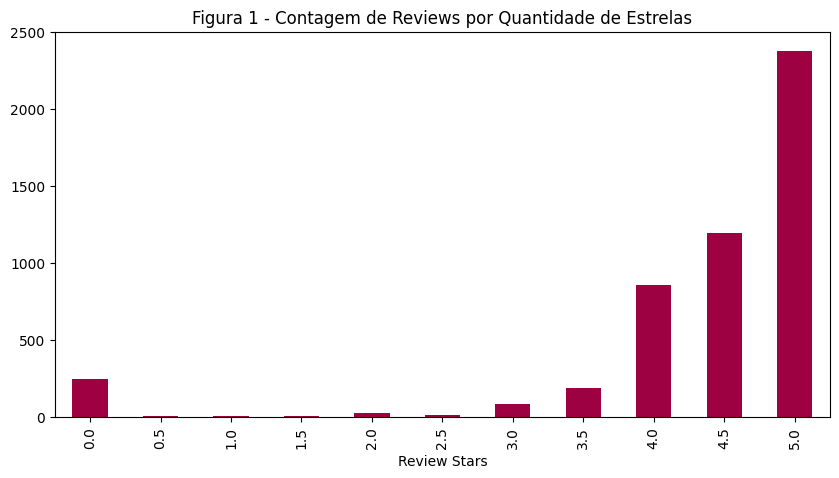

In [16]:
# Criando um gráfico de barra para analisar a distribuição dos reviews por estrelas
axis = reviews_df['RATING_SCORES'].value_counts().sort_index() \
                            .plot(kind='bar',
                                  title=f'Figura {FIG_NUMBER} - Contagem de Reviews por Quantidade de Estrelas',
                                  figsize=(10,5),
                                  colormap=cm.get_cmap('Spectral'))

axis.set_xlabel('Review Stars')
plt.ylim(reviews_df.index.start, reviews_df['RATING_SCORES'].index.stop - 2500) 
plt.show()
FIG_NUMBER += 1

> Podemos observar que a predominância de avaliações é a classificação de 4 estrelas ou mais.

### **Operações Básicas com NLTK**
NLTK é uma plataforma líder para a construção de programas Python para trabalhar com dados de linguagem humana. Ele fornece interfaces fáceis de usar para mais de 50 corpora e recursos lexicais, juntamente com um conjunto de bibliotecas de processamento de texto para classificação, tokenização, lematização, marcação, análise e raciocínio semântico, wrappers para bibliotecas de NLP de força industrial e um fórum de discussão ativo.  
Fonte: [NLTK](https://www.nltk.org/)

In [17]:
# Importando a biblioteca
import nltk

In [18]:
# Usando um review de exemplo
review_example = reviews_df['REVIEWS'][21]
print(review_example)

 What a horrible nightmare! ***


In [20]:
# Baixando módulo necessário
nltk.download('punkt')

# Tokenizando a sentença
example_tokens = nltk.word_tokenize(review_example,language='english',preserve_line=False)
example_tokens[:5]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\018117631\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['What', 'a', 'horrible', 'nightmare', '!']

#### **Parts of Speech Tagging**
A marcação das classes gramaticais é útil para análise sintática, geração de regras gramaticais, análise semântica e  outras tarefas que dependem da compreensão da estrutura da frase.  
Fonte: [Daniel Johnson](https://www.guru99.com/pos-tagging-chunking-nltk.html)

Referência para lista de tags: [IBM](https://www.ibm.com/docs/en/wca/3.5.0?topic=analytics-part-speech-tag-sets)

In [21]:
# Baixando módulo necessário
nltk.download('averaged_perceptron_tagger')

# Aplicando a função pos_tag
tagged = nltk.pos_tag(example_tokens)

# Baixando módulo necessário
tagged[:5]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\018117631\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('What', 'WP'),
 ('a', 'DT'),
 ('horrible', 'JJ'),
 ('nightmare', 'NN'),
 ('!', '.')]

In [22]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

""" A identificação de entidades nomeadas é útil para extração de informações, indexação de documentos, sumarização automática 
de textos e outras tarefas que requerem compreensão do conteúdo do texto além da estrutura gramatical.
Este método divide uma única frase em uma árvore """
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S What/WP a/DT horrible/JJ nightmare/NN !/. */JJ */NN */NN)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\018117631\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\018117631\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### **Análise de Sentimento com VADER**
VADER (_Valence Aware Dictionary for Sentiment Reasoning_, Dicionário com Reconhecimento de Valência para Raciocínio de Sentimento) é um modelo usado para análise de sentimento de texto que é sensível à polaridade (positiva/negativa) e à intensidade (força) da emoção. Está disponível no pacote NLTK (_Natural Language Toolkit_) e pode ser aplicado diretamente a dados de texto não rotulados.  
Fonte: [Aditya Beri](https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664)

In [23]:
# Importando bibliotecas
from nltk.sentiment import SentimentIntensityAnalyzer

# Instanciando um objeto da biblioteca com VADER
sia = SentimentIntensityAnalyzer()

In [24]:
print(review_example)

 What a horrible nightmare! ***


In [25]:
sia.polarity_scores(review_example)

{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5848}

> - O resultado deste teste demonstra que no geral, a sentença tem uma **polaridade negativa**, visto que resultou em um valor de *compound* bastante próximo de -1
> - O valor de *compound* é calculado pela média ponderada dos scores de polaridade das palavras no texto, com base na frequência e intensidade das palavras, sendo um valor que está entre -1 e 1, quanto mais próximo de -1 mais negativa é a conotação da sentença, quanto mais próximo de 1, mais positiva a conotação

In [26]:
# Aplicando o VADER sobre todas as sentenças dos 'REVIEWS' do dataframe 'reviews_df'
polarity_scores = reviews_df['REVIEWS'].apply(lambda review: sia.polarity_scores(review))
result = polarity_scores.to_dict()

In [27]:
# Transformando o resultado com as polaridades em um dataframe
vaders = pd.DataFrame(result)
vaders

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
neg,0.144,0.0000,0.0480,0.1310,0.0830,0.0,0.0000,0.000,0.0890,0.0000,...,0.063,0.0000,0.1470,0.0880,0.000,0.125,0.0,0.0000,0.0250,0.0
neu,0.398,0.7170,0.8550,0.5910,0.8070,1.0,0.8420,0.786,0.7960,0.9090,...,0.801,0.8110,0.7060,0.8270,0.614,0.750,1.0,0.7580,0.8100,1.0
pos,0.458,0.2830,0.0970,0.2780,0.1090,0.0,0.1580,0.214,0.1140,0.0910,...,0.136,0.1890,0.1470,0.0850,0.386,0.125,0.0,0.2420,0.1640,0.0
compound,0.743,0.9781,0.7498,0.7906,0.7055,0.0,0.4588,0.799,0.4595,0.4939,...,0.340,0.5994,0.0174,0.1779,0.890,0.000,0.0,0.4939,0.9001,0.0


In [28]:
# Fazendo a transposição do dataframe (invertendo linhas e colunas)
vaders = vaders.T
vaders[:5]

,neg,neu,pos,compound
0,0.144,0.398,0.458,0.7430
1,0.000,0.717,0.283,0.9781
2,0.048,0.855,0.097,0.7498
3,0.131,0.591,0.278,0.7906
4,0.083,0.807,0.109,0.7055


In [29]:
# Resetando os índices para o dataframe com reviews e com os resultados do VADER
reviews_df = reviews_df.reset_index()
reviews_df
vaders = vaders.reset_index()
vaders

# Concatenando os dois dataframes
# how='right' indica uma junção direita, ou seja, o resultado final conterá todas as linhas do 
# 'vaders' e apenas as linhas de 'reviews_df' que tenham um índice correspondente no 'vaders'
vaders = reviews_df.merge(vaders, on='index', how='right')

In [31]:
# Salvando os resultados num arquivo .csv
vaders.to_csv('./vader.csv', index=False)
vaders.head(5)

,index,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,REVIEWS,neg,neu,pos,compound
0,0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,honor in the individual is virtue honor in a ...,0.144,0.398,0.458,0.7430
1,1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,"Firstly, I must apologise for holding off on ...",0.000,0.717,0.283,0.9781
2,2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,God damn what an impeccable film. Not dated i...,0.048,0.855,0.097,0.7498
3,3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Probably the greatest film ever.. a film abou...,0.131,0.591,0.278,0.7906
4,4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Immediately pulls you in with its captivating...,0.083,0.807,0.109,0.7055


### **Visualização dos Resultados do VADER**

In [32]:
vaders.head()

,index,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,REVIEWS,neg,neu,pos,compound
0,0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,honor in the individual is virtue honor in a ...,0.144,0.398,0.458,0.7430
1,1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,"Firstly, I must apologise for holding off on ...",0.000,0.717,0.283,0.9781
2,2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,God damn what an impeccable film. Not dated i...,0.048,0.855,0.097,0.7498
3,3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Probably the greatest film ever.. a film abou...,0.131,0.591,0.278,0.7906
4,4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Immediately pulls you in with its captivating...,0.083,0.807,0.109,0.7055


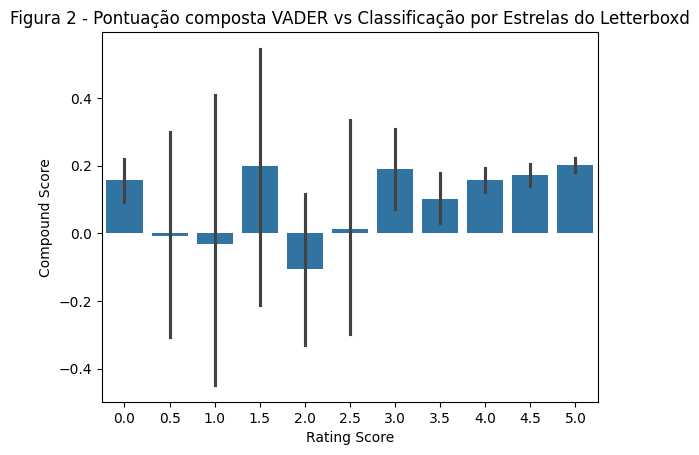

In [243]:
ax = sns.barplot(data=vaders, x='RATING_SCORES', y='compound')
ax.set_title(f'Figura {FIG_NUMBER} - Pontuação composta VADER vs Classificação por Estrelas do Letterboxd')
plt.xlabel('Rating Score')
plt.ylabel('Compound Score')
plt.show()
FIG_NUMBER += 1

> - Com este gráfico de barras espera-se visualizar como o score *compound* do VADER se distribui em relação aos diferentes scores de classificação de estrelas.
> - Isso pode ajudar a entender se há alguma relação entre a percepção de sentimentos dos usuários (representada pelo VADER) e suas classificações em estrelas no Letterboxd.
> - Seria esperado que classificações mais altas tivessem scores *compound* mais positivos, sendo assim, a barra do gráfico deveria crescer a medida que o valor se aproxima de 5.0.
> - Neste caso, podemos perceber um comportamento coerente para as classificações de 3 a 5, o que pode ser ocasionado por uma maior predominância de avaliações neste intervalo de valores (Figura 1) na base de dados como um todo, permitindo um melhor desempenho por parte do algoritmo.

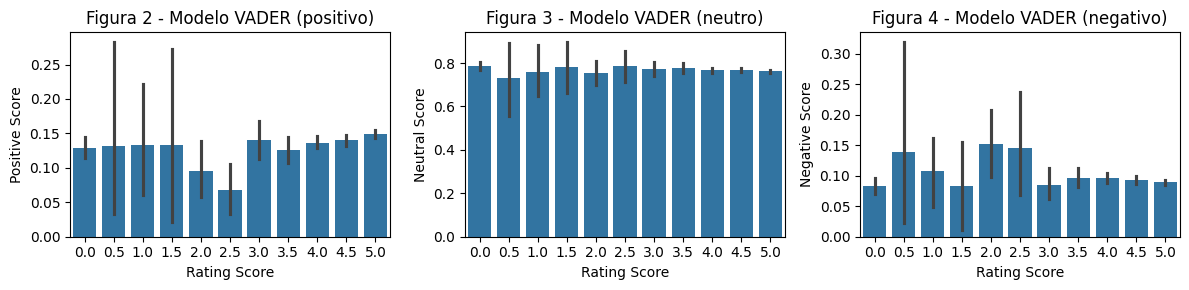

In [33]:
fig, axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders, x='RATING_SCORES',y='pos',ax=axs[0])
axs[0].set_title(f'Figura {FIG_NUMBER} - Modelo VADER (positivo)')
axs[0].set_xlabel('Rating Score')
axs[0].set_ylabel('Positive Score')
FIG_NUMBER += 1

sns.barplot(data=vaders, x='RATING_SCORES',y='neu',ax=axs[1])
axs[1].set_title(f'Figura {FIG_NUMBER} - Modelo VADER (neutro)')
axs[1].set_xlabel('Rating Score')
axs[1].set_ylabel('Neutral Score')
FIG_NUMBER += 1

sns.barplot(data=vaders, x='RATING_SCORES',y='neg',ax=axs[2])
axs[2].set_title(f'Figura {FIG_NUMBER} - Modelo VADER (negativo)')
axs[2].set_xlabel('Rating Score')
axs[2].set_ylabel('Negative Score')
plt.tight_layout()
plt.show()
FIG_NUMBER += 1

> Neste caso estão sendo avaliados cada uma das distribuições de probabilidade geradas pelo VADER.

> **Score Positivo**  
> Para as probabilidades de sentença positiva do VADER seria esperado que as barras aumentassem em tamanho a medida que o valor da classificação cresce. É perceptível uma leve diminuição no tamanho das barras, mas tão significativo quanto esperado.  

> **Score Neutro**  
> Como as barras têm alturas semelhantes independentemente do score de classificação de estrelas, pode-se concluir que não há uma relação clara entre os scores de neutralidade do VADER e os scores de classificação de estrelas, indicando que a percepção de neutralidade do Vader não é afetada pela classificação dos filmes no Letterboxd.

> **Score Negativo**  
> Para as probabilidades de sentença negativa do VADER seria esperado que as barras decrescessem em tamanho a medida que o valor da classificação decresce. É perceptível uma leve diminuição no tamanho das barras, mas tão significativo quanto esperado.  

In [34]:
""" mapear_intervalo:
Mapeia o valor do intervalo -1 a +1 para o intervalo 0 a +5 
entradas
    valor: inteiro de -1 a 1
saída
    novo_valor: inteiro de 0 a 5   """
def mapear_intervalo(valor):
    novo_valor = ((valor + 1) / 2) * 5
    return novo_valor

# Criando uma nova coluna no dataframe para armazenar o valor de compound no intervalo novo
vaders['compound_transformed'] = vaders.apply(lambda x: mapear_intervalo(x['compound']),axis=1)
vaders.head()

,index,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,REVIEWS,neg,neu,pos,compound,compound_transformed
0,0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,honor in the individual is virtue honor in a ...,0.144,0.398,0.458,0.7430,4.35750
1,1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,"Firstly, I must apologise for holding off on ...",0.000,0.717,0.283,0.9781,4.94525
2,2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,God damn what an impeccable film. Not dated i...,0.048,0.855,0.097,0.7498,4.37450
3,3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Probably the greatest film ever.. a film abou...,0.131,0.591,0.278,0.7906,4.47650
4,4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Immediately pulls you in with its captivating...,0.083,0.807,0.109,0.7055,4.26375


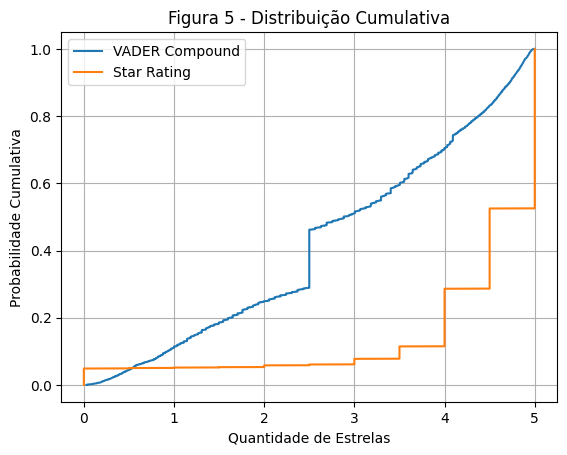

In [35]:
# Calcular a função de distribuição cumulativa (CDF) para cada variável
cdf_variable1 = np.sort(vaders['compound_transformed'])
cdf_variable2 = np.sort(vaders['RATING_SCORES'])
y_variable1 = np.arange(1, len(cdf_variable1) + 1) / len(cdf_variable1)
y_variable2 = np.arange(1, len(cdf_variable2) + 1) / len(cdf_variable2)

# Plotar as CDFs
plt.plot(cdf_variable1, y_variable1, label='VADER Compound')
plt.plot(cdf_variable2, y_variable2, label='Star Rating')

# Adicionar labels e legendas
plt.xlabel('Quantidade de Estrelas')
plt.ylabel('Probabilidade Cumulativa')
plt.title(f'Figura {FIG_NUMBER} - Distribuição Cumulativa')
plt.legend()
plt.grid(True)
plt.show()
FIG_NUMBER += 1

> - No gráfico acima, em **laranja** podemos ver a **distribuição acumulada de probabilidade real** da classificação dos reviews, e em **azul** a **distribuição atribuída pelo VADER** após transformação do valor de *compound* para o intervalo de 1 a 5.
> - Segundo a classificação real, cerca de 50% dos usuários deram até 4,5 estrelas, já pela classificação do VADER, cerca de 50% dos usuários deram até 2,5 estrelas. 

In [247]:
# if rating >= 3 => positive
# if rating <= 2 => negative
# between 2 and 3 => neutral
""" def rating_classificator(rating):
    if rating >= 3:
        return 'pos'
    elif 2 < rating < 3:
        return 'neu'
    return 'neg'

vaders['RATING_CLASSIFICATION'] = vaders['RATING_SCORES'].apply(lambda c: rating_classificator(c))
vaders.insert(6, 'RATING_CLASSIFICATION', vaders.pop('RATING_CLASSIFICATION'))

vaders['compound_classification'] = vaders['compound_transformed'].apply(lambda c: rating_classificator(c))
vaders[:5] """

" def rating_classificator(rating):\n    if rating >= 3:\n        return 'pos'\n    elif 2 < rating < 3:\n        return 'neu'\n    return 'neg'\n\nvaders['RATING_CLASSIFICATION'] = vaders['RATING_SCORES'].apply(lambda c: rating_classificator(c))\nvaders.insert(6, 'RATING_CLASSIFICATION', vaders.pop('RATING_CLASSIFICATION'))\n\nvaders['compound_classification'] = vaders['compound_transformed'].apply(lambda c: rating_classificator(c))\nvaders[:5] "

In [248]:
""" colors = {'pos': 'green', 'neg': 'red', 'neu': 'gray'}

fig, axs = plt.subplots(1,2,figsize=(10, 6))

rating_polarity_count = vaders['RATING_CLASSIFICATION'].value_counts()
vader_polarity_count = vaders['compound_classification'].value_counts()


patches_0, texts_0, pcts_0 = axs[0].pie(rating_polarity_count, labels=rating_polarity_count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Classification according to Letterboxd Star Rating')

patches_1, texts_1, pcts_1 = axs[1].pie(vader_polarity_count, labels=vader_polarity_count.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Classification according to VADER Compound Score')

for i,patch in enumerate(patches_0):
    texts_0[i].set_color(colors[texts_0[i].get_text()])
    patches_0[i].set_color(colors[texts_0[i].get_text()])

for i,patch in enumerate(patches_1):
    texts_1[i].set_color(colors[texts_1[i].get_text()])
    patches_1[i].set_color(colors[texts_1[i].get_text()])

plt.tight_layout()
plt.show() """

" colors = {'pos': 'green', 'neg': 'red', 'neu': 'gray'}\n\nfig, axs = plt.subplots(1,2,figsize=(10, 6))\n\nrating_polarity_count = vaders['RATING_CLASSIFICATION'].value_counts()\nvader_polarity_count = vaders['compound_classification'].value_counts()\n\n\npatches_0, texts_0, pcts_0 = axs[0].pie(rating_polarity_count, labels=rating_polarity_count.index, autopct='%1.1f%%', startangle=140)\naxs[0].set_title('Classification according to Letterboxd Star Rating')\n\npatches_1, texts_1, pcts_1 = axs[1].pie(vader_polarity_count, labels=vader_polarity_count.index, autopct='%1.1f%%', startangle=140)\naxs[1].set_title('Classification according to VADER Compound Score')\n\nfor i,patch in enumerate(patches_0):\n    texts_0[i].set_color(colors[texts_0[i].get_text()])\n    patches_0[i].set_color(colors[texts_0[i].get_text()])\n\nfor i,patch in enumerate(patches_1):\n    texts_1[i].set_color(colors[texts_1[i].get_text()])\n    patches_1[i].set_color(colors[texts_1[i].get_text()])\n\nplt.tight_layout(

### **Análise de Sentimentos com RoBERTa**

In [36]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [37]:
# Definindo a tarefa que será realizada pelo modelo (análise de sentimento)
task = 'sentiment'
# Criando uma string que representa o nome do modelo pré-treinado específico a ser usado
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
# Carrega o tokenizador pré-treinado compatível com o modelo especificado
tokenizer = AutoTokenizer.from_pretrained(MODEL)
# Carrega o modelo pré-treinado de classificação de sequência compatível com a tarefa especificada
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Users\018117631\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [40]:
def roberta_polarity_scores(text):
    # Tokenizando o texto em uma representação numérica
    # 'pt' indica PyTorch, devendo retornar tensores PyTorch
    encoded_text = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    # Passando encoded_text como um dicionário
    output = model(**encoded_text)
    # Convertendo tensor PyTorch para array NumPy
    scores = output[0][0].detach().numpy()
    # Convertendo os scores em probabilidades
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]}
    return scores_dict

In [41]:
result = {}
# Obtendo a avaliação do RoBERTa para cada review
result.update(reviews_df['REVIEWS'].apply(lambda review: roberta_polarity_scores(review)))
# result

In [42]:
# Transformando o resultado em um DataFrame
robertas = pd.DataFrame(result)
robertas[:5]

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
roberta_neg,0.245102,0.011629,0.090518,0.003475,0.003222,0.575648,0.188529,0.044523,0.746215,0.099476,...,0.147474,0.035977,0.155565,0.148535,0.001914,0.122498,0.832808,0.010731,0.006680,0.156693
roberta_neu,0.626207,0.059549,0.192291,0.028253,0.038513,0.395523,0.658305,0.133412,0.206122,0.337525,...,0.549903,0.398452,0.344926,0.482598,0.029936,0.398613,0.148498,0.221657,0.050347,0.810012
roberta_pos,0.128691,0.928822,0.717191,0.968272,0.958266,0.028829,0.153165,0.822065,0.047662,0.562999,...,0.302623,0.565570,0.499509,0.368868,0.968150,0.478889,0.018694,0.767612,0.942973,0.033295


In [43]:
# Invertendo colunas e linhas
robertas = robertas.T
robertas[:5]

,roberta_neg,roberta_neu,roberta_pos
0,0.245102,0.626207,0.128691
1,0.011629,0.059549,0.928822
2,0.090518,0.192291,0.717191
3,0.003475,0.028253,0.968272
4,0.003222,0.038513,0.958266


In [44]:
# Resentando para o índice inteiro
reviews_df = reviews_df.reset_index()
reviews_df
robertas = robertas.reset_index()
robertas

# Unindo os dois dataframes
robertas = reviews_df.merge(robertas, on='index', how='right')

In [46]:
# Salvando o resultado em um arquivo .csv
robertas.to_csv('./robertas.csv', index=False)
robertas.head(5)

,level_0,index,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,REVIEWS,roberta_neg,roberta_neu,roberta_pos
0,0,0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,honor in the individual is virtue honor in a ...,0.245102,0.626207,0.128691
1,1,1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,"Firstly, I must apologise for holding off on ...",0.011629,0.059549,0.928822
2,2,2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,God damn what an impeccable film. Not dated i...,0.090518,0.192291,0.717191
3,3,3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Probably the greatest film ever.. a film abou...,0.003475,0.028253,0.968272
4,4,4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Immediately pulls you in with its captivating...,0.003222,0.038513,0.958266


In [47]:
# Criando um valor compound para o modelo RoBERTa
# Criando uma métrica composta para o RoBERTa
robertas['compound'] = robertas['roberta_neg'] + (robertas['roberta_neu'] * 2) + (robertas['roberta_pos'] * 3) - 2
print(robertas['compound'].min())
print(robertas['compound'].max())

-0.98134613
0.990988


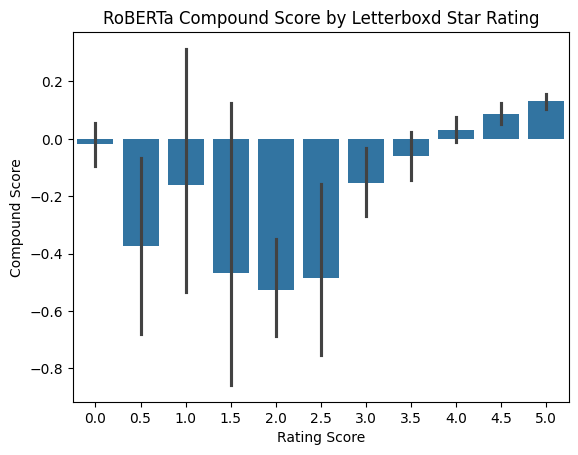

In [48]:
ax = sns.barplot(data=robertas, x='RATING_SCORES', y='compound')
ax.set_title('RoBERTa Compound Score by Letterboxd Star Rating')
plt.xlabel('Rating Score')
plt.ylabel('Compound Score')
plt.show()

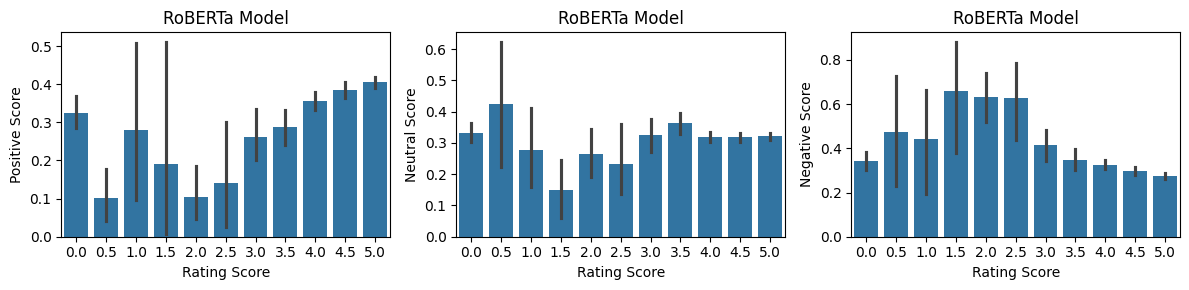

In [49]:
fig, axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=robertas, x='RATING_SCORES',y='roberta_pos',ax=axs[0])
sns.barplot(data=robertas, x='RATING_SCORES',y='roberta_neu',ax=axs[1])
sns.barplot(data=robertas, x='RATING_SCORES',y='roberta_neg',ax=axs[2])
axs[0].set_title('RoBERTa Model')
axs[0].set_xlabel('Rating Score')
axs[0].set_ylabel('Positive Score')

axs[1].set_title('RoBERTa Model')
axs[1].set_xlabel('Rating Score')
axs[1].set_ylabel('Neutral Score')

axs[2].set_title('RoBERTa Model')
axs[2].set_xlabel('Rating Score')
axs[2].set_ylabel('Negative Score')
plt.tight_layout()
plt.show()

In [51]:
robertas['compound_transformed'] = robertas.apply(lambda x: mapear_intervalo(x['compound']),axis=1)
robertas[:5]

,level_0,index,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,REVIEWS,roberta_neg,roberta_neu,roberta_pos,compound,compound_transformed
0,0,0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,honor in the individual is virtue honor in a ...,0.245102,0.626207,0.128691,-0.116411,2.208972
1,1,1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,"Firstly, I must apologise for holding off on ...",0.011629,0.059549,0.928822,0.917193,4.792982
2,2,2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,God damn what an impeccable film. Not dated i...,0.090518,0.192291,0.717191,0.626673,4.066681
3,3,3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Probably the greatest film ever.. a film abou...,0.003475,0.028253,0.968272,0.964797,4.911992
4,4,4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Immediately pulls you in with its captivating...,0.003222,0.038513,0.958266,0.955044,4.887611


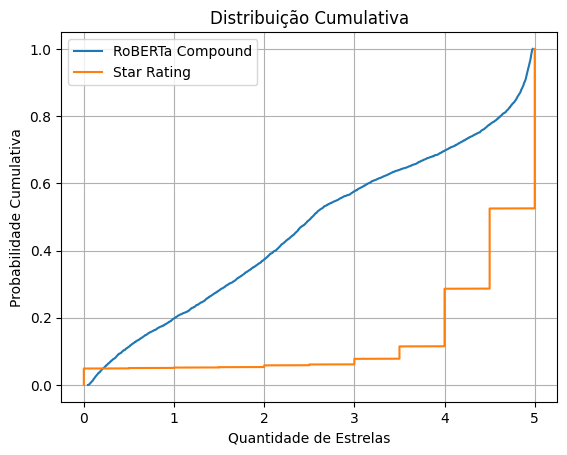

In [52]:
# Calcular a função de distribuição cumulativa (CDF) para cada variável
cdf_variable1 = np.sort(robertas['compound_transformed'])
cdf_variable2 = np.sort(robertas['RATING_SCORES'])
y_variable1 = np.arange(1, len(cdf_variable1) + 1) / len(cdf_variable1)
y_variable2 = np.arange(1, len(cdf_variable2) + 1) / len(cdf_variable2)

# Plotar as CDFs
plt.plot(cdf_variable1, y_variable1, label='RoBERTa Compound')
plt.plot(cdf_variable2, y_variable2, label='Star Rating')

# Adicionar labels e legendas
plt.xlabel('Quantidade de Estrelas')
plt.ylabel('Probabilidade Cumulativa')
plt.title('Distribuição Cumulativa')
plt.legend()
plt.grid(True)
plt.show()

### **VADER vs RoBERTa**

In [55]:
vaders.head()

,index,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,REVIEWS,neg,neu,pos,compound,compound_transformed
0,0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,honor in the individual is virtue honor in a ...,0.144,0.398,0.458,0.7430,4.35750
1,1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,"Firstly, I must apologise for holding off on ...",0.000,0.717,0.283,0.9781,4.94525
2,2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,God damn what an impeccable film. Not dated i...,0.048,0.855,0.097,0.7498,4.37450
3,3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Probably the greatest film ever.. a film abou...,0.131,0.591,0.278,0.7906,4.47650
4,4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Immediately pulls you in with its captivating...,0.083,0.807,0.109,0.7055,4.26375


In [59]:
robertas.drop(columns=['level_0'], inplace=True)
robertas.head()

,index,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,REVIEWS,roberta_neg,roberta_neu,roberta_pos,roberta_compound,roberta_compound_transformed
0,0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,honor in the individual is virtue honor in a ...,0.245102,0.626207,0.128691,-0.116411,2.208972
1,1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,"Firstly, I must apologise for holding off on ...",0.011629,0.059549,0.928822,0.917193,4.792982
2,2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,God damn what an impeccable film. Not dated i...,0.090518,0.192291,0.717191,0.626673,4.066681
3,3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Probably the greatest film ever.. a film abou...,0.003475,0.028253,0.968272,0.964797,4.911992
4,4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Immediately pulls you in with its captivating...,0.003222,0.038513,0.958266,0.955044,4.887611


In [62]:
vaders.rename(columns={"neg": "vader_neg", "neu": "vader_neu", "pos": "vader_pos", 
                       "compound_transformed": "vader_compound_transformed", "compound":"vader_compound", 
                       "compound_classification":"vader_compound_classification"}, inplace=True)
vaders.columns

Index(['index', 'NAME', 'YEAR', 'DIRECTOR', 'RATINGS', 'RATING_SCORES',
       'REVIEWS', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'vader_compound_transformed'],
      dtype='object')

In [63]:
robertas.rename(columns={"compound_transformed": "roberta_compound_transformed", "compound":"roberta_compound", "compound_classification":"roberta_compound_classification"}, inplace=True)
robertas.columns

Index(['index', 'NAME', 'YEAR', 'DIRECTOR', 'RATINGS', 'RATING_SCORES',
       'REVIEWS', 'roberta_neg', 'roberta_neu', 'roberta_pos',
       'roberta_compound', 'roberta_compound_transformed'],
      dtype='object')

In [64]:
scores_df = pd.merge(vaders, robertas, on=['index', 'NAME', 'YEAR', 'DIRECTOR', 'RATINGS', 'RATING_SCORES', 'REVIEWS'])

In [65]:
scores_df.head()

,index,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,REVIEWS,vader_neg,vader_neu,vader_pos,vader_compound,vader_compound_transformed,roberta_neg,roberta_neu,roberta_pos,roberta_compound,roberta_compound_transformed
0,0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,honor in the individual is virtue honor in a ...,0.144,0.398,0.458,0.7430,4.35750,0.245102,0.626207,0.128691,-0.116411,2.208972
1,1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,"Firstly, I must apologise for holding off on ...",0.000,0.717,0.283,0.9781,4.94525,0.011629,0.059549,0.928822,0.917193,4.792982
2,2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,God damn what an impeccable film. Not dated i...,0.048,0.855,0.097,0.7498,4.37450,0.090518,0.192291,0.717191,0.626673,4.066681
3,3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Probably the greatest film ever.. a film abou...,0.131,0.591,0.278,0.7906,4.47650,0.003475,0.028253,0.968272,0.964797,4.911992
4,4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Immediately pulls you in with its captivating...,0.083,0.807,0.109,0.7055,4.26375,0.003222,0.038513,0.958266,0.955044,4.887611


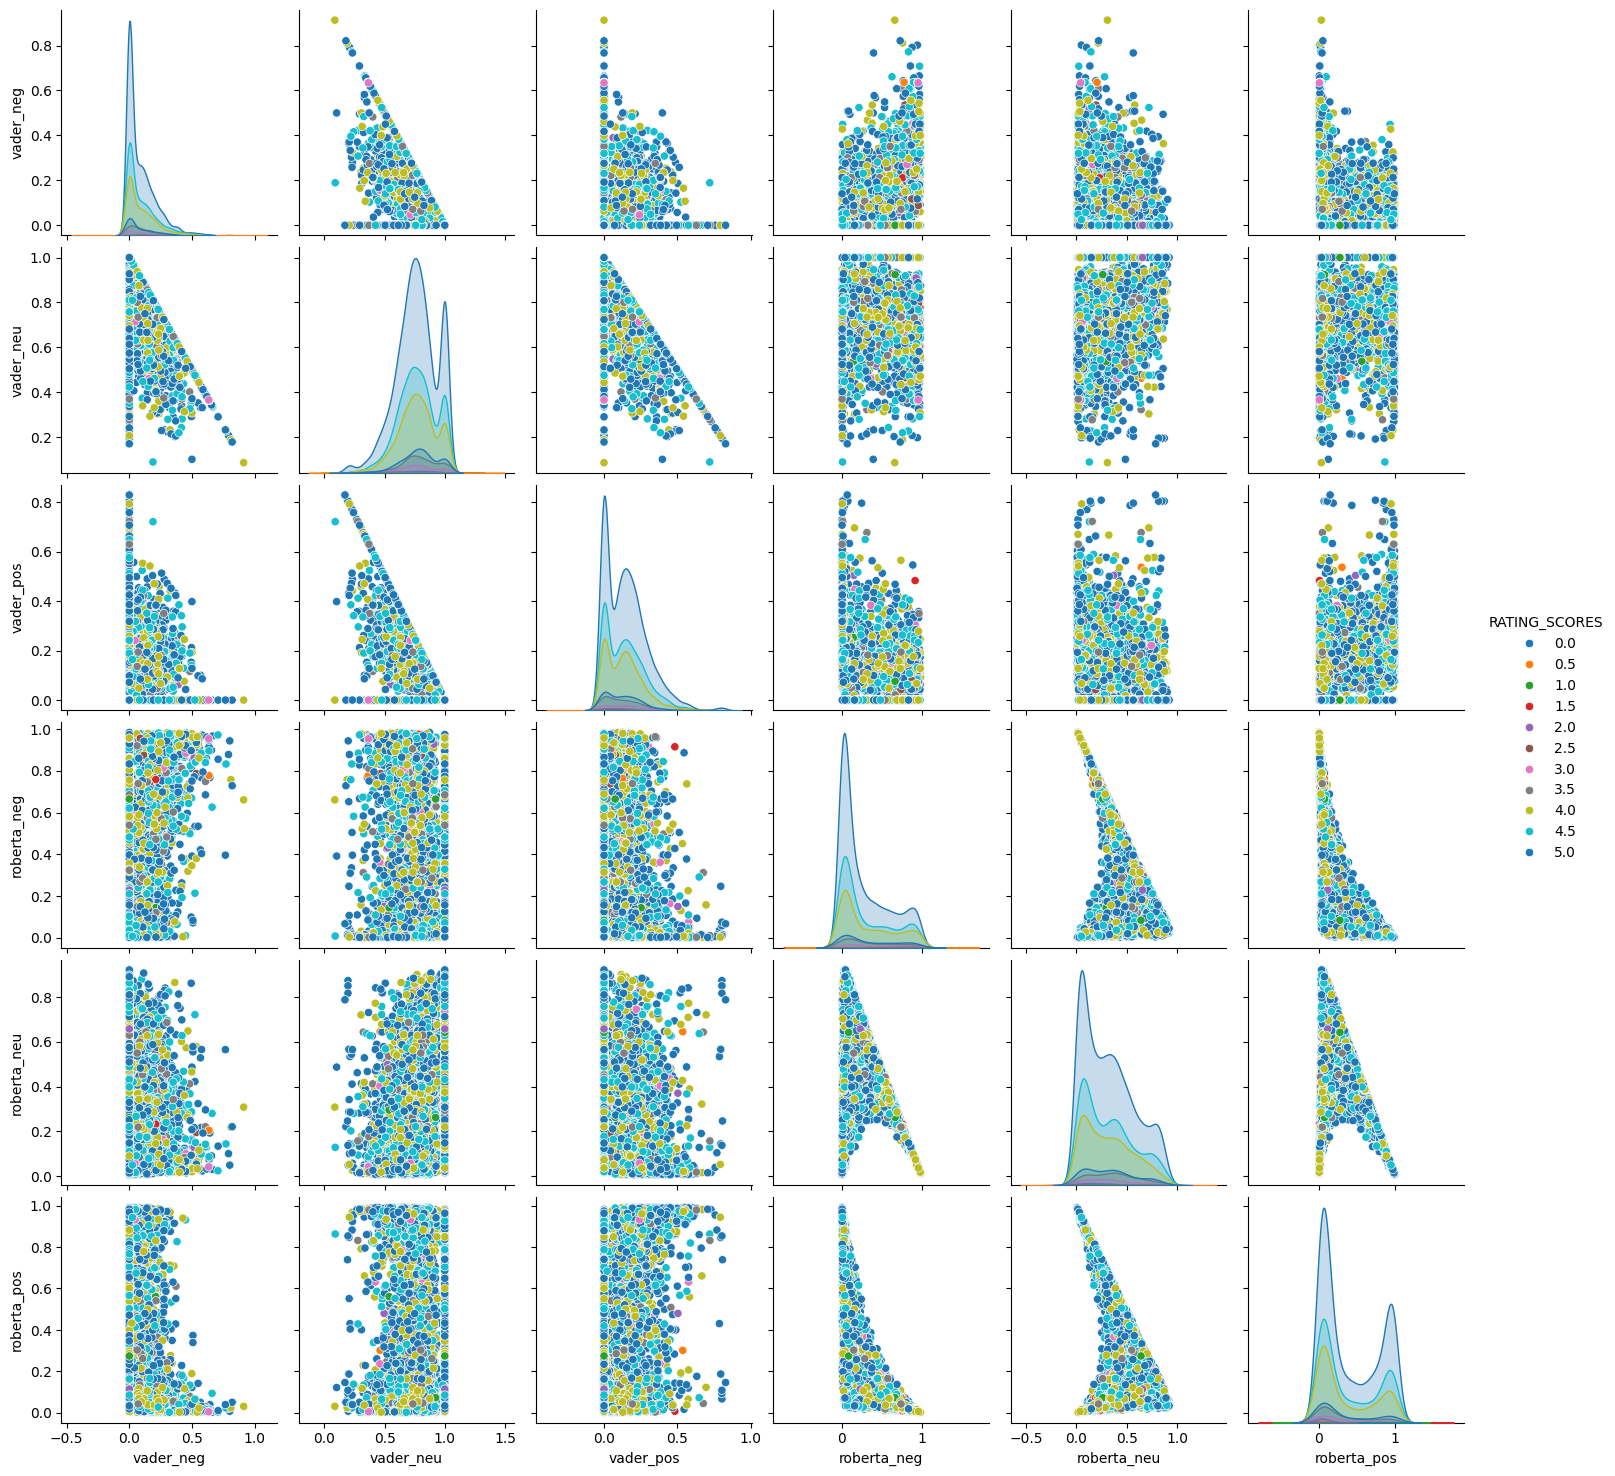

In [66]:
sns.pairplot(data=scores_df, vars=['vader_neg', 'vader_neu', 'vader_pos',\
                                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
                                  hue='RATING_SCORES', palette='tab10')
plt.show()

### **Analisando Sentimento em Sentenças Isoladas**

#### **VADER**

In [67]:
# Obtendo os reviews cujo score em estrelas dado pelo usuário é igual a 1,
# ordenando o resultado em ordem decrescente pelo score positivo do RoBERTa
# e selecionando o primeiro review da lista
scores_df.query('RATING_SCORES == 1').\
        sort_values('vader_pos',ascending=False)['REVIEWS'].\
        values[0]

" ⛔ 1,3 | 2020 list | Look how brilliant and bold and well-crafted and influential and complex and personal and meaningless and confusing and overrated and boring and unwatchable this legendary piece of cinematic self-analasys is! This goes straight into the core of creativity and finds absolutely nothing over there. It's the perfect movie for intelligent people who love to write something intelligent about a movie and then share it with other intelligent people who also love to write and share such intelligent things. It's all good, I get it. You guys go ahead, do your thing, I'll do mine. ***"

> No caso acima o review realmente tem uma conotação positiva e o VADER é coerente em avaliá-lo positivamente. Este caso é um bom exemplo da disparidade comum entre o review de estrelas e o review escrito.

In [68]:
scores_df.query('RATING_SCORES == 1').\
        sort_values('vader_pos',ascending=False)['REVIEWS'].\
        values[1]

" second movie I've watched today with a lovely score, a beautiful dance sequence, mind numbingly boring almost everything, and multiple rape scenes that are passed off as positive for the woman. ***"

> Neste caso o VADER parece ser influenciado pela presença de palavras com sentido positivo como "lovely" e "beautiful", contudo, o usuário está destacando apenas alguns aspectos do filme enquanto os aspectos negativos pesaram mais em sua avaliação geral.

In [69]:
scores_df.query('RATING_SCORES == 5').\
        sort_values('vader_neg',ascending=False)['REVIEWS'].\
        values[0]

' Devastated!! ***'

> Neste caso o VADER considera a palavra como sendo de conotação negativa, contudo, o filme pareceu cumprir sua proposta para o usuário, mas essa sutileza na avaliação não pôde ser capturada pelo modelo.

In [70]:
scores_df.query('RATING_SCORES == 1').\
        sort_values('vader_neu',ascending=False)['REVIEWS'].\
        values[0]

' Pumping up the Boobs! ***'

> Avaliação parece coerente para a categoria de um review neutro.

In [71]:
scores_df.query('RATING_SCORES == 5').\
        sort_values('vader_neu',ascending=False)['REVIEWS'].\
        values[1]

' M - A - S - T - E - R - P - I - E - C - E ***'

> A influência para essa categorização parece vir da influência da consequência da formatação do texto na tokenização do mesmo."

#### **RoBERTa**

In [72]:
scores_df.query('RATING_SCORES == 1').\
        sort_values('roberta_pos',ascending=False)['REVIEWS'].\
        values[0]

" ⛔ 1,3 | 2020 list | Look how brilliant and bold and well-crafted and influential and complex and personal and meaningless and confusing and overrated and boring and unwatchable this legendary piece of cinematic self-analasys is! This goes straight into the core of creativity and finds absolutely nothing over there. It's the perfect movie for intelligent people who love to write something intelligent about a movie and then share it with other intelligent people who also love to write and share such intelligent things. It's all good, I get it. You guys go ahead, do your thing, I'll do mine. ***"

In [73]:
# Obtendo o segundo review mais positivo de acordo com o RoBERTa
scores_df.query('RATING_SCORES == 1').\
        sort_values('roberta_pos',ascending=False)['REVIEWS'].\
        values[1]

" second movie I've watched today with a lovely score, a beautiful dance sequence, mind numbingly boring almost everything, and multiple rape scenes that are passed off as positive for the woman. ***"

> As mesmas conclusões podem ser tiradas para o desempenho do RoBERTa nesta query específica.

In [74]:
scores_df.query('RATING_SCORES == 5').\
        sort_values('roberta_neg',ascending=False)['REVIEWS'].\
        values[0]

' there is literally nothing more i hate about this movie than the fact that i could never see it again for the first time ***'

> O modelo faz esta avaliação incoerente, visto que, o review em si pode ser considerado ambíguo sem considerar a mensagem final, os termos isolados influenciaram mais do que o contexto na avaliação.

In [75]:
scores_df.query('RATING_SCORES == 1').\
        sort_values('roberta_neu',ascending=False)['REVIEWS'].\
        values[0]

' Pumping up the Boobs! ***'

> Avaliação parece coerente para a categoria de um review neutro.

In [76]:
scores_df.query('RATING_SCORES == 5').\
        sort_values('roberta_neu',ascending=False)['REVIEWS'].\
        values[1]

' Toshiro Mifune G.O.A.T, Jadi Pengen Rewatch Harakiri ***'

> Avaliação parece coerente para a categoria de um review neutro.

In [77]:
scores_df.query('RATING_SCORES == 5').\
        sort_values('roberta_neu',ascending=False)['REVIEWS'].\
        values

array([' One of the actresses in this is named "Ursula Jeans" ***',
       ' Toshiro Mifune G.O.A.T, Jadi Pengen Rewatch Harakiri ***',
       ' A documentary about my birth ***', ...,
       ' the ending is one of the most perfect moments in the history of cinema, loved this so so much ***',
       " I've just discovered one of my favourite films ever!!! Leslie Cheung, I'll adore you forever <3 ***",
       ' this film made me remember how finding a passion in cinema is one of the greatest things that has ever happened to me and as keanu reeves said I LOVE MOVIES! GOSH, I LOVE MOVIES! I LOVE WATCHING THEM AND I WILL LOVE MAKING THEM! ***'],
      dtype=object)

> É interessante notar que o RoBERTa não foi influenciado pelo texto mal formatado da última avaliação neutra do VADER acima.